<a href="https://colab.research.google.com/github/dilp90/PDI/blob/main/PDI_7_OperAritmeticas_y_Logicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Operaciones aritméticas y lógicas**

In [1]:
#Librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Suma ponderada**

La suma ponderada de imágenes es una técnica en procesamiento digital de imágenes que combina dos imágenes con diferentes pesos, permitiendo crear transiciones suaves o fusiones entre ellas.

Se usa en:
* Mezcla de imágenes (Blending)
* Superposición de efectos visuales
* Combinación de información de diferentes fuentes

In [8]:
# Cargar las dos imágenes
imagen2 = cv2.imread("/content/StarryNight.jpg", cv2.IMREAD_GRAYSCALE)
imagen1 = cv2.imread("/content/platano.jpg", cv2.IMREAD_GRAYSCALE)

# Redimensionar ambas imágenes al mismo tamaño si es necesario
imagen2_res = cv2.resize(imagen2, (imagen1.shape[1], imagen1.shape[0]))

# Aplicar la suma ponderada con pesos α=0.7 y β=0.3
alpha = 0.3  # Peso de la primera imagen
beta = 0.7   # Peso de la segunda imagen
gamma = 10     # Ajuste de brillo

imagen_resultado = cv2.addWeighted(imagen1, alpha, imagen2_res, beta, gamma)


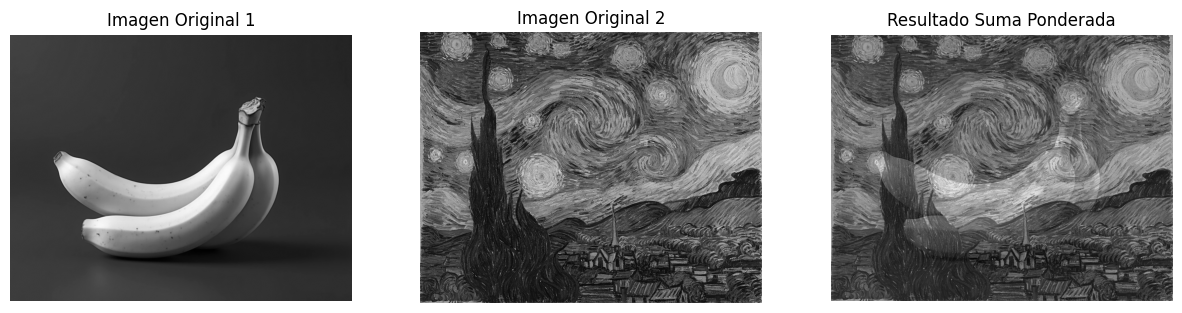

In [9]:
# Mostrar imágenes
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen1, cmap="gray")
plt.title("Imagen Original 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(imagen2, cmap="gray")
plt.title("Imagen Original 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(imagen_resultado, cmap="gray")
plt.title("Resultado Suma Ponderada")
plt.axis("off")

plt.show()

**Suma promedio**

La suma promedio de imágenes es una técnica de procesamiento digital de imágenes donde varias imágenes se suman y luego se dividen por el número de imágenes, obteniendo un promedio.

Se usa para:
* Reducir ruido en imágenes (Noise Reduction)
* Mejorar calidad en imágenes con poca luz
* Fusionar imágenes de múltiples exposiciones

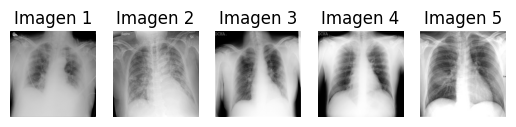

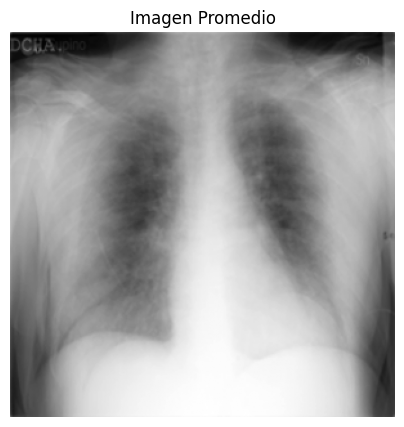

In [10]:
# Cargar varias imágenes en una lista
# Imagenes descargadas de: https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database/data
imagenes = ["/content/COVID-1.png", "/content/COVID-10.png", "/content/COVID-100.png", "/content/COVID-1000.png", "/content/COVID-1002.png"]
imagenes_cargadas = [cv2.imread(img, cv2.IMREAD_GRAYSCALE) for img in imagenes]

# Verificar que todas las imágenes tengan el mismo tamaño
alto, ancho = imagenes_cargadas[0].shape
imagenes_cargadas = [cv2.resize(img, (ancho, alto)) for img in imagenes_cargadas]

# Crear una imagen acumuladora en formato flotante
suma = np.zeros((alto, ancho), dtype=np.float32)

# Sumar todas las imágenes
for img in imagenes_cargadas:
    suma += img

# Calcular el promedio dividiendo por la cantidad de imágenes
imagen_promedio = suma / len(imagenes_cargadas)

# Convertir la imagen a formato uint8 para visualización
"""
En OpenCV, las imágenes se almacenan generalmente en formato
uint8 (valores de píxeles entre 0 y 255). Sin embargo, cuando
realizamos operaciones matemáticas como la suma promedio de
imágenes, los valores pueden volverse flotantes o salir del
rango válido.
"""
imagen_promedio = cv2.convertScaleAbs(imagen_promedio)

# Mostrar imágenes originales
for i, img in enumerate(imagenes_cargadas):
    plt.subplot(1, len(imagenes), i+1)  # Crear subgráficos en una fila
    #plt.figure(figsize=(10, 5))
    plt.imshow(img, cmap="gray")  # Mostrar imagen
    plt.title(f"Imagen {i+1}")  # Título de cada imagen
    plt.axis("off")  # Ocultar ejes

plt.show()

#Mostrar imagen promedio
plt.figure(figsize=(5, 5))
#plt.subplot(1, 3, 1)
plt.imshow(imagen_promedio, cmap="gray")
plt.title("Imagen Promedio")
plt.axis("off")
plt.show()

**Resta**

La resta de imágenes se utiliza en procesamiento digital de imágenes para resaltar diferencias entre dos imágenes. Es útil en:

* Detección de cambios (Ejemplo: comparación de imágenes médicas)
* Sustracción de fondo (Ejemplo: eliminar fondo en videos)
* Realce de bordes

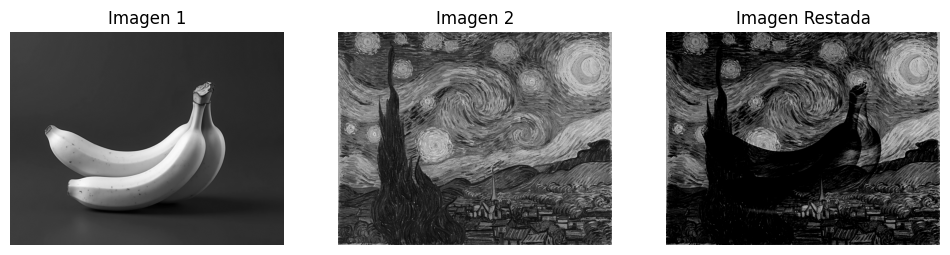

In [11]:
# Cargar las dos imágenes
img1 = cv2.imread("/content/platano.jpg", cv2.IMREAD_GRAYSCALE)  # Cargar en escala de grises
img2 = cv2.imread("/content/StarryNight.jpg", cv2.IMREAD_GRAYSCALE)

# Asegurar que tengan el mismo tamaño
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Realizar la resta de imágenes
resta = cv2.subtract(img2, img1)  # OpenCV maneja el rango automáticamente

# Mostrar imágenes originales y resultado
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title("Imagen 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title("Imagen 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(resta, cmap='gray')
plt.title("Imagen Restada")
plt.axis("off")

plt.show()


**Multiplicación**

La multiplicación de una imagen por un factor se usa en procesamiento digital para:

* Ajustar el brillo de una imagen.
* Realizar operaciones aritméticas en imágenes (como filtrado o normalización).
* Aumentar o reducir la intensidad de los píxeles.

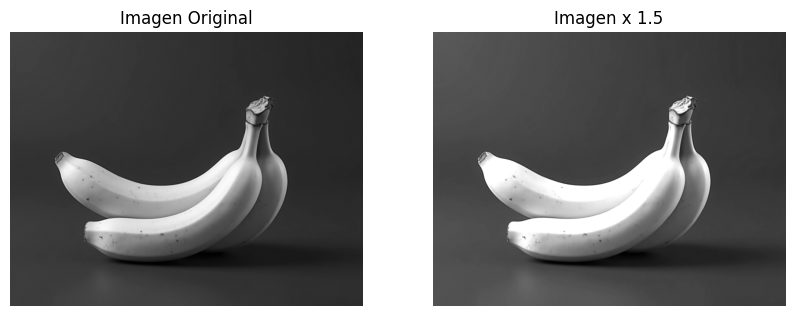

In [12]:
# Cargar imagen en escala de grises
img = cv2.imread("/content/platano.jpg", cv2.IMREAD_GRAYSCALE)

# Definir el factor de multiplicación
factor = 1.5  # Aumenta el brillo en un 50%

# Multiplicar la imagen por el factor
img_multiplicada = cv2.multiply(img, np.array([factor], dtype=np.float32))

# Convertir la imagen a uint8 para visualización correcta
img_multiplicada = cv2.convertScaleAbs(img_multiplicada)

# Mostrar la imagen original y la modificada
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_multiplicada, cmap='gray')
plt.title(f"Imagen x {factor}")
plt.axis("off")

plt.show()


**Multiplicación elemento por elemento**

La multiplicación elemento por elemento entre dos imágenes se usa en procesamiento digital para:
* Aplicar máscaras (multiplicando una imagen por una máscara binaria).
* Fusionar imágenes con operaciones algebraicas.
* Filtrado de imágenes (por ejemplo, aplicar atenuación).

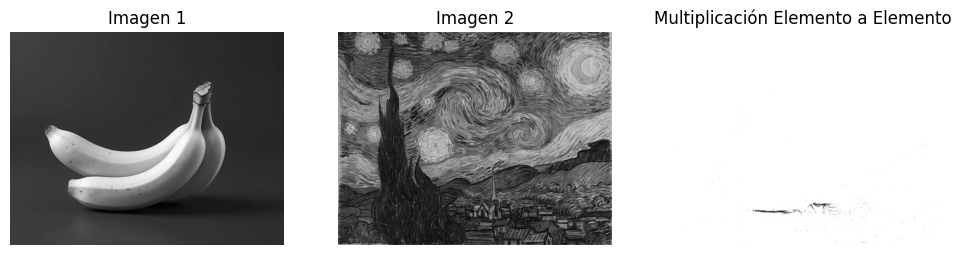

In [17]:
# Cargar las dos imágenes en escala de grises
img1 = cv2.imread("/content/platano.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/content/StarryNight.jpg", cv2.IMREAD_GRAYSCALE)

# Redimensionar para que tengan el mismo tamaño
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Multiplicación elemento a elemento
img_multiplicada = cv2.multiply(img2, img1)  # OpenCV maneja el rango automáticamente

# Convertir la imagen resultante a uint8
img_multiplicada = cv2.convertScaleAbs(img_multiplicada)

# Mostrar imágenes originales y resultado
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title("Imagen 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title("Imagen 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_multiplicada, cmap='gray')
plt.title("Multiplicación Elemento a Elemento")
plt.axis("off")

plt.show()


Operaciones Lógicas AND, OR, NOT y XOR

Las operaciones lógicas en imágenes se usan para:
* Crear máscaras binarias para segmentación.
* Fusionar imágenes con transparencia.
* Detectar diferencias entre imágenes.
* Resaltar regiones específicas en visión artificial.

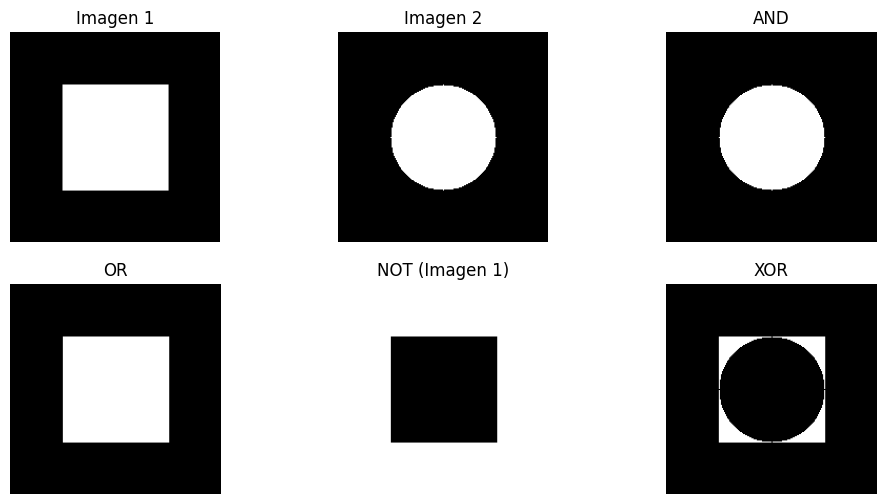

In [21]:

# Crear dos imágenes binarias (Ejemplo: cuadrados blancos sobre fondo negro)
img1 = np.zeros((200, 200), dtype=np.uint8)
img2 = np.zeros((200, 200), dtype=np.uint8)

cv2.rectangle(img1, (50, 50), (150, 150), 255, -1)  # Cuadrado blanco en img1
cv2.circle(img2, (100, 100), 50, 255, -1)  # Círculo blanco en img2

# Aplicar operaciones lógicas
and_img = cv2.bitwise_and(img1, img2)  # AND lógico
or_img = cv2.bitwise_or(img1, img2)    # OR lógico
not_img1 = cv2.bitwise_not(img1)       # NOT lógico en img1
xor_img = cv2.bitwise_xor(img1, img2)  # XOR lógico

# Mostrar las imágenes
titles = ["Imagen 1", "Imagen 2", "AND", "OR", "NOT (Imagen 1)", "XOR"]
images = [img1, img2, and_img, or_img, not_img1, xor_img]

plt.figure(figsize=(12, 6))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.show()
